# 複数回のロックダウンがあった歳のMH(応諾性)への影響評価

## Import packages and load data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
plt.rcParams["font.family"] = "serif"

## Load data

In [2]:
# load the baseline data
df_bl  = pd.read_csv("/Users/nooboo/Desktop/LSE/ST451/Project/data/UKDA-9001-tab/tab/css_baseline_demo.tab", sep="\t")

# load all survey data
df_orig = pd.read_csv("/Users/nooboo/Desktop/LSE/ST451/Project/data/UKDA-9001-tab/tab/css_panel_2020-2022.tab", sep="\t")

necessary_cols= ['record_id', 'wave', 'wave_name', 'date',  ## Data info
                 'followingisolation',  ## Compliance index
                 'soc1', 'soc2', 'soc3', 'soc4', 'phq1', 'phq2', 'phq3', 'phq4', 'phq5', 'phq6', 'phq7', 'phq8', 'phq9', ## depression index
                 'gad1', 'gad2', 'gad3', 'gad4','gad5', 'gad6','gad7'] ## Anxiety index

df_survey = df_orig.loc[:, necessary_cols]

# convert the `date` column into datetime data 
df_survey['date'] = pd.to_datetime(df_survey['date'], format="%m/%d/%Y", errors='coerce')

/var/folders/xm/__jx4yd975z4mz5rc23cwt_h0000gn/T/ipykernel_2522/3195931593.py:5: DtypeWarning: Columns (4,69,80,81,83,89,90,91,92,93,94,95,96,97,98,99,100,159,160,161,162,163,164,165,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orig = pd.read_csv("/Users/nooboo/Desktop/LSE/ST451/Project/data/UKDA-9001-tab/tab/css_panel_2020-2022.tab", sep="\t")


In [3]:
df_region = df_bl.loc[:, ['country', 'area', 'region', 'living', 'ownership', 'garden1', 'garden2', 'garden3', 'garden4']]

In [4]:
df_whales = df_region.loc[df_region['country']==2]
df_england  = df_region.loc[df_region['country']==1]

leicster = df_region.loc[df_region['region']=='5']
london = df_region.loc[df_region['region']=='7']

london_list  = list(london.index)
leicster_list = list(leicster.index)

whales_list = list(df_whales.index)
england_list = list(df_england.index)

In [111]:
england_wo_leicster = [x for x in england_list if x not in leicster_list]

In [118]:
df_nonna_ungroup = df_survey.copy()

df_nonna_ungroup['date'].loc[df_nonna_ungroup['date']==" "] = np.nan

print(df_nonna_ungroup.isna().sum()['date'])

df_nonna_ungroup = df_nonna_ungroup.dropna(subset=['date'])


/var/folders/xm/__jx4yd975z4mz5rc23cwt_h0000gn/T/ipykernel_44365/2185033981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonna_ungroup['date'].loc[df_nonna_ungroup['date']==" "] = np.nan


7793


In [119]:
df_nonna_ungroup['followingisolation'].loc[df_nonna_ungroup['followingisolation']==' '] = np.nan

df_nonna_ungroup = df_nonna_ungroup.dropna(subset=['followingisolation'])

# Define the age category labels
age_categories = ['18-29', '30-49', '50-64', '65+']

# Define the age category conditions
conditions = [
    (df_bl['age'] >= 18) & (df_bl['age'] <= 29),
    (df_bl['age'] >= 30) & (df_bl['age'] <= 49),
    (df_bl['age'] >= 50) & (df_bl['age'] <= 64),
    (df_bl['age'] >= 65)
]

# Create the new age category column
df_bl['age_category'] = np.select(conditions, age_categories, default='Other')

df_bl_target = df_bl.loc[:, ['record_id','age', 'age_category', 'gender', 'ethnic', 
                             'education', 'employment', 'rooms', 'country']]

phq_cols = [f"phq{i}" for i in range (1, 10)]
gad_cols = [f"gad{i}" for i in range (1, 8)]

convert_cols = phq_cols + gad_cols

for col in convert_cols:
    df_nonna_ungroup[col].loc[df_nonna_ungroup[col]==' '] = np.nan
    df_nonna_ungroup      = df_nonna_ungroup.dropna(subset=[col])
    df_nonna_ungroup[col] = df_nonna_ungroup[col].astype(int)

df_nonna_ungroup['compliance_index'] = df_nonna_ungroup['followingisolation'].astype(int) * (100/7)
df_nonna_ungroup['depression_index'] = df_nonna_ungroup.apply(lambda row: row['phq1'] + row['phq2'] + row['phq3'] + row['phq4'] + row['phq5'] + row['phq6'] + row['phq7'] + row['phq8'] + row['phq9'], axis=1)
df_nonna_ungroup['anxiety_index']    = df_nonna_ungroup.apply(lambda row: row['gad1'] + row['gad2'] + row['gad3'] + row['gad4'] + row['gad5'] + row['gad6'] + row['gad7'], axis=1)


# merge the dataframes on 'record_id'
merged_df = pd.merge(df_bl_target, df_nonna_ungroup, on='record_id', how='left')

/var/folders/xm/__jx4yd975z4mz5rc23cwt_h0000gn/T/ipykernel_44365/163721421.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonna_ungroup[col].loc[df_nonna_ungroup[col]==' '] = np.nan
/var/folders/xm/__jx4yd975z4mz5rc23cwt_h0000gn/T/ipykernel_44365/163721421.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonna_ungroup[col].loc[df_nonna_ungroup[col]==' '] = np.nan
/var/folders/xm/__jx4yd975z4mz5rc23cwt_h0000gn/T/ipykernel_44365/163721421.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

## Plot

In [120]:
# Step 2: Subtract the min date from each date to get the difference in days
merged_df['days_since_min_date'] = (merged_df['date'] - merged_df['date'].min()).dt.days

merged_df = merged_df.dropna()

# Step 3: Divide the difference by 7 and round down to the nearest integer to get the week number
merged_df['week_number'] = np.floor(merged_df['days_since_min_date'] / 7).astype(int)

merged_df

,record_id,age,age_category,gender,ethnic,education,employment,rooms,country,wave,...,gad3,gad4,gad5,gad6,gad7,compliance_index,depression_index,anxiety_index,days_since_min_date,week_number
0,1,57,50-64,1,1,2,5,5,1,1.0,...,1.0,0.0,0.0,0.0,0.0,71.428571,5.0,1.0,4.0,0
1,1,57,50-64,1,1,2,5,5,1,2.0,...,1.0,0.0,0.0,0.0,0.0,100.000000,4.0,1.0,11.0,1
2,1,57,50-64,1,1,2,5,5,1,3.0,...,0.0,1.0,0.0,0.0,0.0,100.000000,4.0,1.0,18.0,2
3,1,57,50-64,1,1,2,5,5,1,4.0,...,0.0,1.0,0.0,0.0,0.0,100.000000,6.0,1.0,26.0,3
4,1,57,50-64,1,1,2,5,5,1,5.0,...,0.0,1.0,1.0,0.0,0.0,100.000000,4.0,2.0,34.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159746,80413,40,30-49,2,1,6,5,5,1,1.0,...,1.0,1.0,0.0,2.0,1.0,100.000000,18.0,7.0,47.0,6
1159747,80413,40,30-49,2,1,6,5,5,1,2.0,...,2.0,2.0,2.0,2.0,2.0,85.714286,8.0,14.0,55.0,7
1159748,80413,40,30-49,2,1,6,5,5,1,3.0,...,3.0,2.0,0.0,3.0,2.0,85.714286,12.0,16.0,63.0,9
1159749,80413,40,30-49,2,1,6,5,5,1,4.0,...,2.0,2.0,0.0,2.0,1.0,85.714286,14.0,9.0,72.0,10


In [131]:
merged_df['whales'] = np.where(merged_df['record_id'].isin(england_list), 2, merged_df['record_id'].isin(whales_list).astype(np.int))
merged_df['leicster'] = np.where(merged_df['record_id'].isin(england_wo_leicster), 2, merged_df['record_id'].isin(leicster_list).astype(np.int))

merged_df['whales'].loc[merged_df['whales']==1] = 'Whales'
merged_df['whales'].loc[merged_df['whales']==2] = 'England'

merged_df['leicster'].loc[merged_df['leicster']==1] = 'Leicester'
merged_df['leicster'].loc[merged_df['leicster']==2] = 'England'
# merged_df['leicster'] = merged_df['record_id'].isin(leicster_list).astype(np.int)


/var/folders/xm/__jx4yd975z4mz5rc23cwt_h0000gn/T/ipykernel_44365/2870837562.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  merged_df['whales'] = np.where(merged_df['record_id'].isin(england_list), 2, merged_df['record_id'].isin(whales_list).astype(np.int))
/var/folders/xm/__jx4yd975z4mz5rc23cwt_h0000gn/T/ipykernel_44365/2870837562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [122]:
merged_df

,record_id,age,age_category,gender,ethnic,education,employment,rooms,country,wave,...,gad5,gad6,gad7,compliance_index,depression_index,anxiety_index,days_since_min_date,week_number,whales,leicster
0,1,57,50-64,1,1,2,5,5,1,1.0,...,0.0,0.0,0.0,71.428571,5.0,1.0,4.0,0,2,England
1,1,57,50-64,1,1,2,5,5,1,2.0,...,0.0,0.0,0.0,100.000000,4.0,1.0,11.0,1,2,England
2,1,57,50-64,1,1,2,5,5,1,3.0,...,0.0,0.0,0.0,100.000000,4.0,1.0,18.0,2,2,England
3,1,57,50-64,1,1,2,5,5,1,4.0,...,0.0,0.0,0.0,100.000000,6.0,1.0,26.0,3,2,England
4,1,57,50-64,1,1,2,5,5,1,5.0,...,1.0,0.0,0.0,100.000000,4.0,2.0,34.0,4,2,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159746,80413,40,30-49,2,1,6,5,5,1,1.0,...,0.0,2.0,1.0,100.000000,18.0,7.0,47.0,6,0,0
1159747,80413,40,30-49,2,1,6,5,5,1,2.0,...,2.0,2.0,2.0,85.714286,8.0,14.0,55.0,7,0,0
1159748,80413,40,30-49,2,1,6,5,5,1,3.0,...,0.0,3.0,2.0,85.714286,12.0,16.0,63.0,9,0,0
1159749,80413,40,30-49,2,1,6,5,5,1,4.0,...,0.0,2.0,1.0,85.714286,14.0,9.0,72.0,10,0,0


In [123]:
merged_df['mild_depression'] = ((merged_df['depression_index']>=5) & (merged_df['depression_index']<=9)).astype(int)
merged_df['moderate_depression'] = ((merged_df['depression_index']>=10) & (merged_df['depression_index']<=15)).astype(int)
merged_df['moderate_severe_depression'] = ((merged_df['depression_index']>=15) & (merged_df['depression_index']<=19)).astype(int)
merged_df['severe_depression'] = ((merged_df['depression_index']>=20) & (merged_df['depression_index']<=27)).astype(int)


merged_df['mild_anxiety'] = ((merged_df['anxiety_index']>=5) & (merged_df['depression_index']<=9)).astype(int)
merged_df['moderate_anxiety'] = ((merged_df['anxiety_index']>=10) & (merged_df['depression_index']<=14)).astype(int)
merged_df['severe_anxiety'] = (merged_df['anxiety_index']>=15).astype(int)

merged_df['self_harm'] = (merged_df['phq9']>=2).astype(int)
merged_df

,record_id,age,age_category,gender,ethnic,education,employment,rooms,country,wave,...,whales,leicster,mild_depression,moderate_depression,moderate_severe_depression,severe_depression,mild_anxiety,moderate_anxiety,severe_anxiety,self_harm
0,1,57,50-64,1,1,2,5,5,1,1.0,...,2,England,1,0,0,0,0,0,0,0
1,1,57,50-64,1,1,2,5,5,1,2.0,...,2,England,0,0,0,0,0,0,0,0
2,1,57,50-64,1,1,2,5,5,1,3.0,...,2,England,0,0,0,0,0,0,0,0
3,1,57,50-64,1,1,2,5,5,1,4.0,...,2,England,1,0,0,0,0,0,0,0
4,1,57,50-64,1,1,2,5,5,1,5.0,...,2,England,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159746,80413,40,30-49,2,1,6,5,5,1,1.0,...,0,0,0,0,1,0,0,0,0,1
1159747,80413,40,30-49,2,1,6,5,5,1,2.0,...,0,0,1,0,0,0,1,1,0,0
1159748,80413,40,30-49,2,1,6,5,5,1,3.0,...,0,0,0,1,0,0,0,1,1,0
1159749,80413,40,30-49,2,1,6,5,5,1,4.0,...,0,0,0,1,0,0,0,0,0,1


In [1]:
response = []
for record_id in list(merged_df['record_id'].unique()):
    response.append(len(merged_df['record_id'].loc[merged_df['record_id']==record_id]))

NameError: name 'merged_df' is not defined

In [ ]:
filtered_df = merged_df.groupby('record_id').filter(lambda x: len(x) > 20)
display(filtered_df['date'].loc[filtered_df['record_id']==4])

In [ ]:
display(filtered_df['date'].loc[filtered_df['record_id']==4])

In [ ]:
plt.hist(response, bins=max(response))
plt.title('Histogram of Respondents')
plt.xlabel('Respondents')
plt.ylabel('Frequency')
plt.show()

In [124]:

merged_df = merged_df.loc[merged_df['date'] <= '2021-05-01']

merged_df

,record_id,age,age_category,gender,ethnic,education,employment,rooms,country,wave,...,whales,leicster,mild_depression,moderate_depression,moderate_severe_depression,severe_depression,mild_anxiety,moderate_anxiety,severe_anxiety,self_harm
0,1,57,50-64,1,1,2,5,5,1,1.0,...,2,England,1,0,0,0,0,0,0,0
1,1,57,50-64,1,1,2,5,5,1,2.0,...,2,England,0,0,0,0,0,0,0,0
2,1,57,50-64,1,1,2,5,5,1,3.0,...,2,England,0,0,0,0,0,0,0,0
3,1,57,50-64,1,1,2,5,5,1,4.0,...,2,England,1,0,0,0,0,0,0,0
4,1,57,50-64,1,1,2,5,5,1,5.0,...,2,England,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159743,80412,32,30-49,2,1,5,5,4,2,26.0,...,0,0,0,0,0,0,0,0,0,0
1159746,80413,40,30-49,2,1,6,5,5,1,1.0,...,0,0,0,0,1,0,0,0,0,1
1159747,80413,40,30-49,2,1,6,5,5,1,2.0,...,0,0,1,0,0,0,1,1,0,0
1159748,80413,40,30-49,2,1,6,5,5,1,3.0,...,0,0,0,1,0,0,0,1,1,0


In [129]:
# Convert your lists to datetime format
UK_ld_start = pd.to_datetime(["2020-03-23", "2020-10-23", "2020-11-05", "2021-01-06"])
UK_ld_end   = pd.to_datetime(["2020-06-23", "2020-11-09", "2020-12-02", "2021-03-15"])

# UK_ld_start = pd.to_datetime(["2020-03-23", "2020-07-04", "2020-11-05", "2021-01-06"])
# UK_ld_end   = pd.to_datetime(["2020-06-23", "2020-09-15", "2020-12-02", "2021-03-15"])

# Get the minimum date from your original 'date' column
min_date = pd.to_datetime(merged_df['date']).min()

# Subtract min_date from each lockdown date and convert to weeks
UK_ld_start_weeks = list(((UK_ld_start - min_date).days / 7).astype(int))
UK_ld_end_weeks   = list(((UK_ld_end - min_date).days / 7).astype(int))

UK_ld_end_weeks

[13, 33, 36, 51]

In [ ]:
def weekly_ts_plot(col, name, xlabel="Week Number"):
    df = merged_df.groupby(['week_number', 'age_category'])[col].agg(['sum', 'count']).reset_index()
    df[f'{col}_ratio'] = df['sum'] / df['count']
    age_categories = df['age_category'].unique()

    for category in age_categories:
        df_subset = df[df['age_category'] == category]
        plt.plot(df_subset['week_number'], df_subset[f'{col}_ratio'], label=category)

    # Add a rectangle for a total of 4 lockdowns
    for i in range(3):
        ## i-th Lockdown
        ld = Rectangle((UK_ld_start_weeks[i], plt.ylim()[0]), 
                        UK_ld_end_weeks[i] - UK_ld_start_weeks[i], plt.ylim()[1], 
                        alpha=0.5)

    # Add the rectangle to the plot
        plt.gca().add_patch(ld)

    plt.title(f'{name} Ratio In UK Across Waves According to Age Group')
    plt.xlabel(xlabel)
    plt.ylabel(f'{name} Ratio')
    plt.legend()
    plt.grid(True)
    plt.show()


weekly_ts_plot(col='mild_depression',
               name='Mild Depression')
weekly_ts_plot(col='moderate_depression',        
               name='Moderate Depression',
               xlabel='Week Number (Blue Shades are during the Lockdown Period)')
weekly_ts_plot(col='moderate_severe_depression', 
               name='Moderate Severe Depression',
               xlabel='Week Number (Blue Shades are during the Lockdown Period)')
weekly_ts_plot(col='severe_depression',          
               name='Severe Depression')

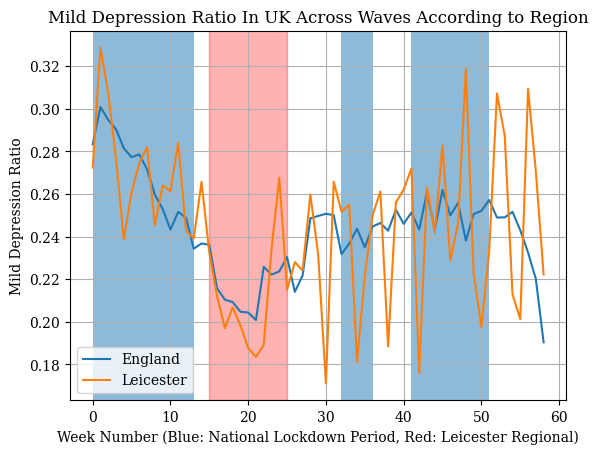

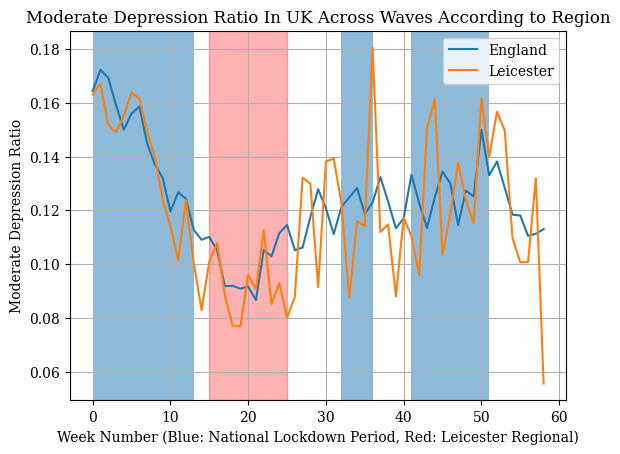

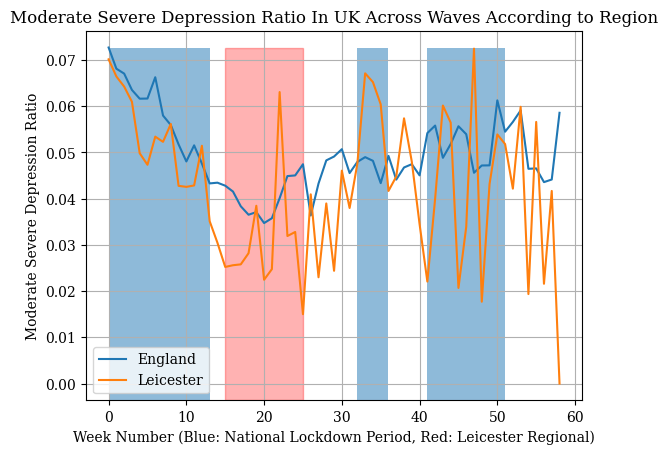

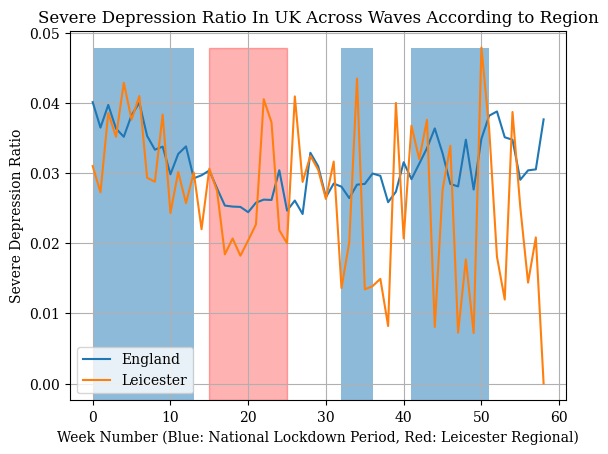

In [125]:
def weekly_leicster_ts_plot(col, name, xlabel="Week Number"):
    df = merged_df.groupby(['week_number', 'leicster'])[col].agg(['sum', 'count']).reset_index()
    df[f'{col}_ratio'] = df['sum'] / df['count']
    # age_categories = df['leicster'].unique()
    age_categories = df[df['leicster'].isin(['Leicester', 'England'])]['leicster'].unique() 

    for category in age_categories:
        df_subset = df[df['leicster'] == category]
        plt.plot(df_subset['week_number'], df_subset[f'{col}_ratio'], label=category)
        # plt.plot(df_subset['week_number'], df_subset['sum'], label=category)

    # Add a rectangle for a total of 4 lockdowns
    for i in range(4):
        if i==1:
            ld = Rectangle((UK_ld_start_weeks[i], plt.ylim()[0]), 
                            UK_ld_end_weeks[i] - UK_ld_start_weeks[i], plt.ylim()[1], 
                            alpha=0.3,
                            color='red')
        else:
            ## i-th Lockdown
            ld = Rectangle((UK_ld_start_weeks[i], plt.ylim()[0]), 
                            UK_ld_end_weeks[i] - UK_ld_start_weeks[i], plt.ylim()[1], 
                            alpha=0.5)

    # Add the rectangle to the plot
        plt.gca().add_patch(ld)

    plt.title(f'{name} Ratio In UK Across Waves According to Region')
    plt.xlabel(xlabel)
    plt.ylabel(f'{name} Ratio')
    plt.legend()
    plt.grid(True)
    plt.show()

weekly_leicster_ts_plot(col='mild_depression',
                        name='Mild Depression',
                        xlabel='Week Number (Blue: National Lockdown Period, Red: Leicester Regional)')
weekly_leicster_ts_plot(col='moderate_depression',        
                        name='Moderate Depression',
                        xlabel='Week Number (Blue: National Lockdown Period, Red: Leicester Regional)')
weekly_leicster_ts_plot(col='moderate_severe_depression', 
                        name='Moderate Severe Depression',
                        xlabel='Week Number (Blue: National Lockdown Period, Red: Leicester Regional)')
weekly_leicster_ts_plot(col='severe_depression',          
                        name='Severe Depression', 
                        xlabel='Week Number (Blue: National Lockdown Period, Red: Leicester Regional)')

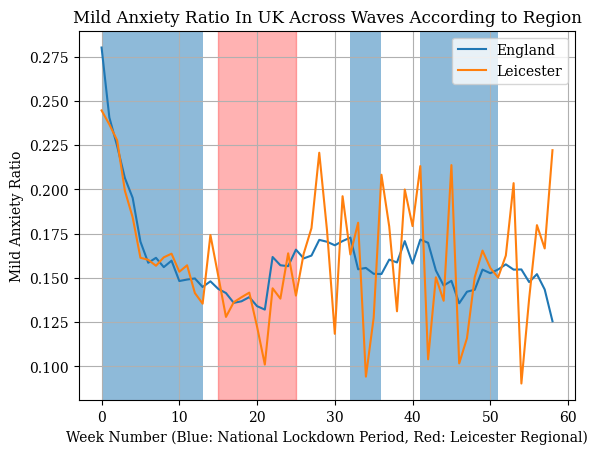

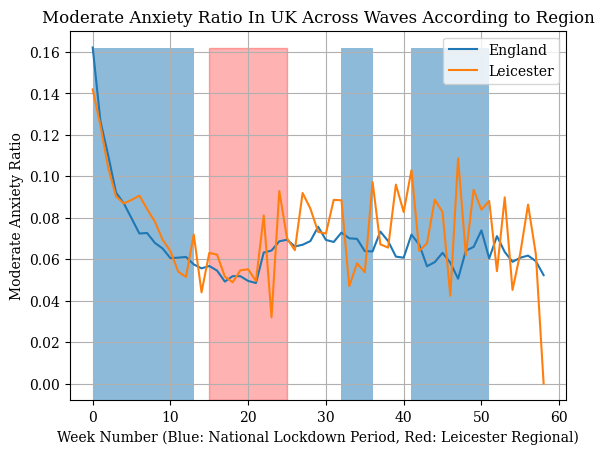

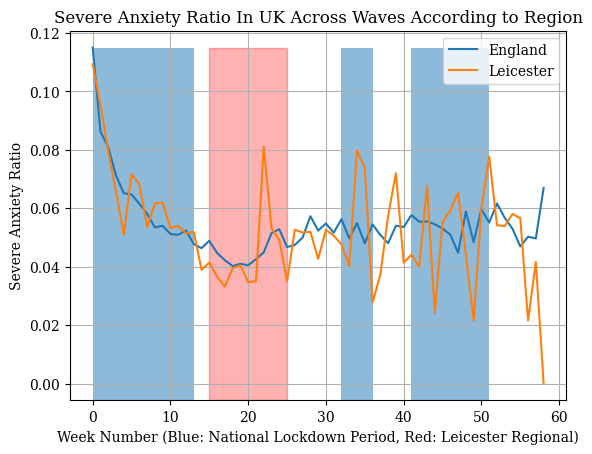

In [128]:
weekly_leicster_ts_plot(col='mild_anxiety',
                        name='Mild Anxiety',
                        xlabel='Week Number (Blue: National Lockdown Period, Red: Leicester Regional)')
weekly_leicster_ts_plot(col='moderate_anxiety',        
                        name='Moderate Anxiety',
                        xlabel='Week Number (Blue: National Lockdown Period, Red: Leicester Regional)')
weekly_leicster_ts_plot(col='severe_anxiety',          
                        name='Severe Anxiety', 
                        xlabel='Week Number (Blue: National Lockdown Period, Red: Leicester Regional)')


In [ ]:
weekly_ts_plot(col='compliance_index', name='Compliance Index')

In [ ]:
weekly_ts_plot(col='mild_anxiety',     
               name='Mild Anxiety')
weekly_ts_plot(col='moderate_anxiety', 
               name='Moderate Anxiety')
weekly_ts_plot(col='severe_anxiety',   
               name='Severe Anxiety')

In [136]:
def weekly_whales_ts_plot(col, name, xlabel="Week Number"):
    df = merged_df.groupby(['week_number', 'whales'])[col].agg(['sum', 'count']).reset_index()
    df[f'{col}_ratio'] = df['sum'] / df['count']
    # age_categories = df['whales'].unique()
    age_categories = df[df['whales'].isin(['Whales', 'England'])]['whales'].unique() 

    for category in age_categories:
        df_subset = df[df['whales'] == category]
        # plt.plot(df_subset['week_number'], df_subset[f'{col}_ratio'], label=category)
        plt.plot(df_subset['week_number'], df_subset['sum'], label=category)

    # Add a rectangle for a total of 4 lockdowns
    for i in range(4):
        if i==1:
            ld = Rectangle((UK_ld_start_weeks[i], plt.ylim()[0]), 
                            UK_ld_end_weeks[i] - UK_ld_start_weeks[i], plt.ylim()[1], 
                            alpha=0.3,
                            color='red')
        else:
            ## i-th Lockdown
            ld = Rectangle((UK_ld_start_weeks[i], plt.ylim()[0]), 
                            UK_ld_end_weeks[i] - UK_ld_start_weeks[i], plt.ylim()[1], 
                            alpha=0.5)

    # Add the rectangle to the plot
        plt.gca().add_patch(ld)

    plt.title(f'{name} Per Week')
    plt.xlabel(xlabel)
    plt.ylabel(f'{name}')
    plt.legend()
    plt.grid(True)
    plt.show()

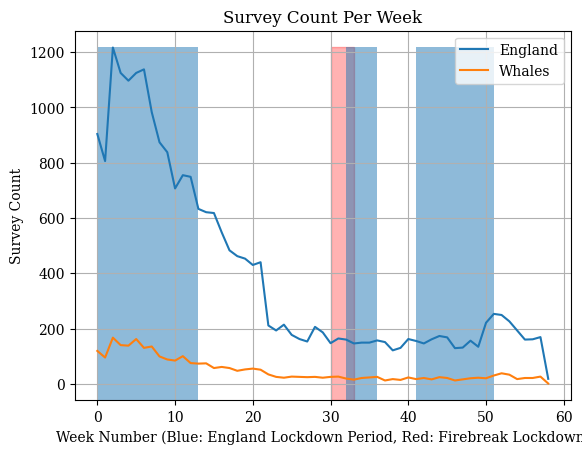

In [137]:
weekly_whales_ts_plot(col='severe_depression',          
                      name='Survey Count', 
                      xlabel='Week Number (Blue: England Lockdown Period, Red: Firebreak Lockdown)')

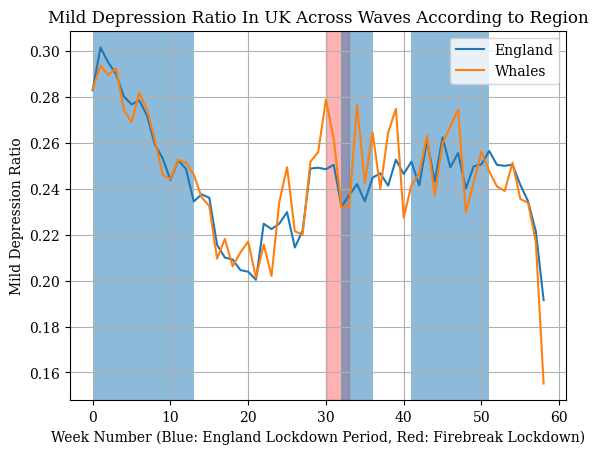

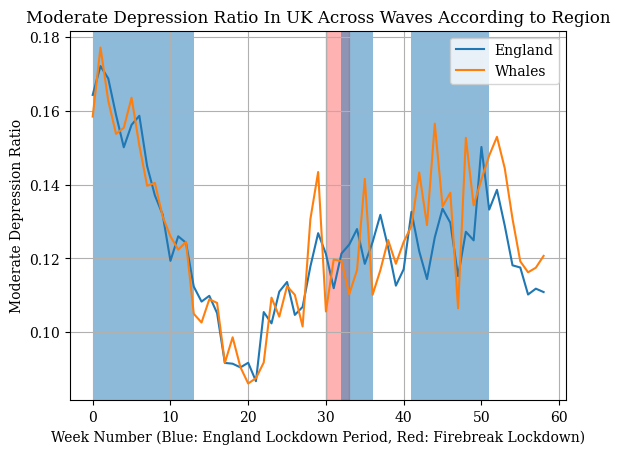

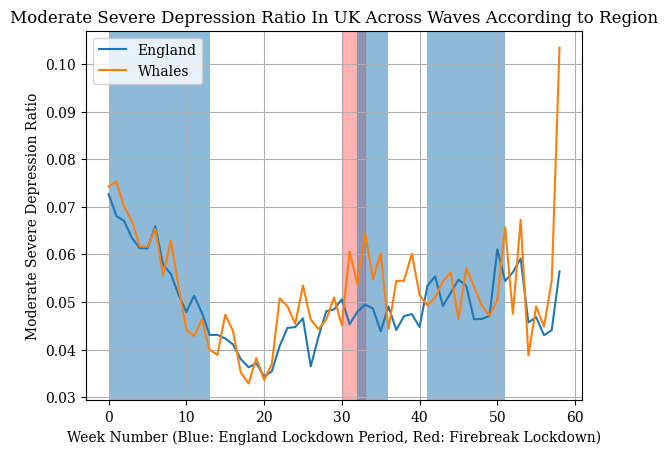

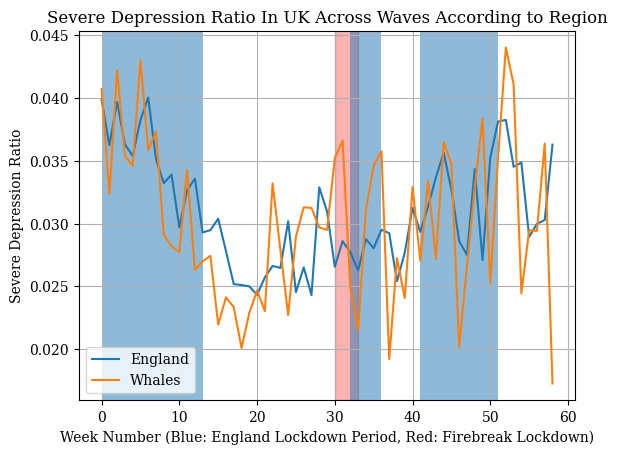

In [133]:
weekly_whales_ts_plot(col='mild_depression',
                      name='Mild Depression',
                      xlabel='Week Number (Blue: England Lockdown Period, Red: Firebreak Lockdown)')
weekly_whales_ts_plot(col='moderate_depression',
                      name='Moderate Depression',
                      xlabel='Week Number (Blue: England Lockdown Period, Red: Firebreak Lockdown)')
weekly_whales_ts_plot(col='moderate_severe_depression', 
                      name='Moderate Severe Depression',
                      xlabel='Week Number (Blue: England Lockdown Period, Red: Firebreak Lockdown)')
weekly_whales_ts_plot(col='severe_depression',          
                      name='Severe Depression', 
                      xlabel='Week Number (Blue: England Lockdown Period, Red: Firebreak Lockdown)')

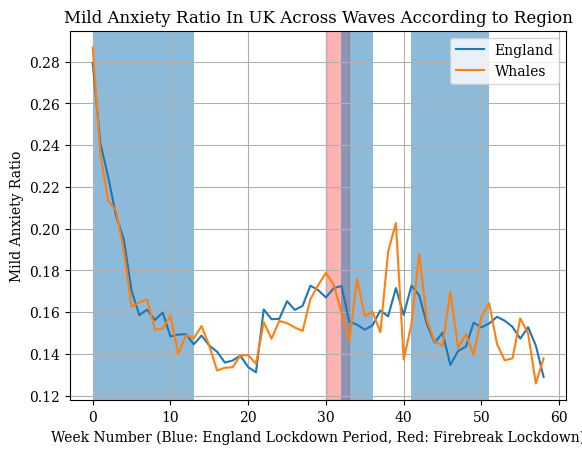

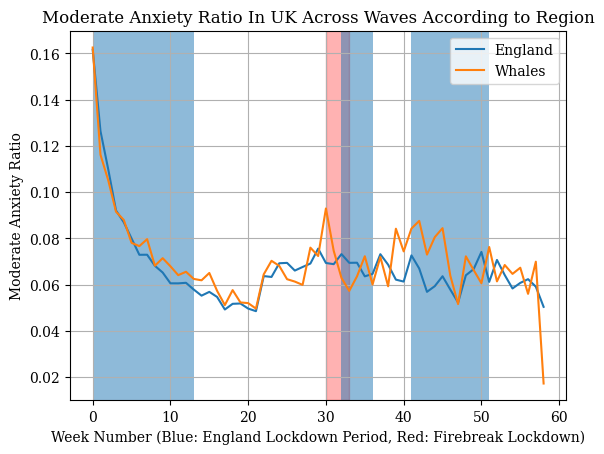

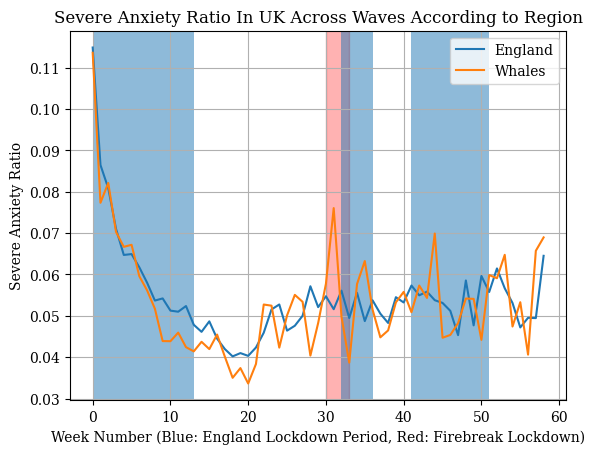

In [134]:
weekly_whales_ts_plot(col='mild_anxiety',
                      name='Mild Anxiety',
                      xlabel='Week Number (Blue: England Lockdown Period, Red: Firebreak Lockdown)')
weekly_whales_ts_plot(col='moderate_anxiety',        
                      name='Moderate Anxiety',
                      xlabel='Week Number (Blue: England Lockdown Period, Red: Firebreak Lockdown)')
weekly_whales_ts_plot(col='severe_anxiety',          
                      name='Severe Anxiety', 
                      xlabel='Week Number (Blue: England Lockdown Period, Red: Firebreak Lockdown)')

In [ ]:
weekly_ts_plot('self_harm', 'Self Harm Behavior')

In [ ]:
df_plt_mean = merged_df.groupby(['wave', 'age_category'])['compliance_index'].mean().reset_index()
df_plt_mean.groupby(['age_category'])['compliance_index'].plot(legend=True)

plt.title('Severe Depression Ratio In UK Across Waves According to Age Group')
plt.grid(True)
plt.show()

In [ ]:
## Define the start and end dates of the rectangle (lockdown)
UK_ld_start = ["2020-03-16", "2020-10-30", "2020-12-23"]
UK_ld_end   = ["2020-06-11", "2020-12-09", "2021-03-15"]

df_plt_mean = merged_df.groupby(['date', 'age_category'])['mild_depression'].agg(['sum', 'count']).reset_index()
df_plt_mean = df_plt_mean.set_index('date')
df_plt_mean['mild_depression_ratio'] = df_plt_mean['sum'] / df_plt_mean['count']
df_plt_mean.loc[:'2021-05-01'].groupby(['age_category'])['mild_depression_ratio'].plot(legend=True)

# Add a rectangle for a total of 4 lockdowns
for i in range(3):
  ## i-th Lockdown
  ld = Rectangle((pd.to_datetime(UK_ld_start[i]), plt.ylim()[0]), 
                  pd.to_datetime(UK_ld_end[i])-pd.to_datetime(UK_ld_start[i]), plt.ylim()[1], 
                  alpha=0.5)

  # Add the rectangle to the plot
  plt.gca().add_patch(ld)

plt.title('Mild Depression Ratio In UK Across Time According to Age Group')
plt.grid(True)
plt.show()

df_plt_mean = merged_df.groupby(['date', 'age_category'])['moderate_depression'].agg(['sum', 'count']).reset_index()
df_plt_mean = df_plt_mean.set_index('date')
df_plt_mean['moderate_depression_ratio'] = df_plt_mean['sum'] / df_plt_mean['count']
df_plt_mean.loc[:'2021-05-01'].groupby(['age_category'])['moderate_depression_ratio'].plot(legend=True)

# Add a rectangle for a total of 4 lockdowns
for i in range(3):
  ## i-th Lockdown
  ld = Rectangle((pd.to_datetime(UK_ld_start[i]), plt.ylim()[0]), 
                  pd.to_datetime(UK_ld_end[i])-pd.to_datetime(UK_ld_start[i]), plt.ylim()[1], 
                  alpha=0.5)

  # Add the rectangle to the plot
  plt.gca().add_patch(ld)

plt.title('Moderate Depression Ratio In UK Across Time According to Age Group')
plt.grid(True)
plt.show()

df_plt_mean = merged_df.groupby(['date', 'age_category'])['moderate_severe_depression'].agg(['sum', 'count']).reset_index()
df_plt_mean = df_plt_mean.set_index('date')
df_plt_mean['moderate_severe_depression_ratio'] = df_plt_mean['sum'] / df_plt_mean['count']
df_plt_mean.loc[:'2021-05-01'].groupby(['age_category'])['moderate_severe_depression_ratio'].plot(legend=True)

# Add a rectangle for a total of 4 lockdowns
for i in range(3):
  ## i-th Lockdown
  ld = Rectangle((pd.to_datetime(UK_ld_start[i]), plt.ylim()[0]), 
                  pd.to_datetime(UK_ld_end[i])-pd.to_datetime(UK_ld_start[i]), plt.ylim()[1], 
                  alpha=0.5)

  # Add the rectangle to the plot
  plt.gca().add_patch(ld)

plt.title('Moderate Severe Depression Ratio In UK Across Time According to Age Group')
plt.grid(True)
plt.show()


df_plt_mean = merged_df.groupby(['date', 'age_category'])['severe_depression'].agg(['sum', 'count']).reset_index()
df_plt_mean = df_plt_mean.set_index('date')
df_plt_mean['severe_depression_ratio'] = df_plt_mean['sum'] / df_plt_mean['count']
df_plt_mean.loc[:'2021-05-01'].groupby(['age_category'])['severe_depression_ratio'].plot(legend=True)

# Add a rectangle for a total of 4 lockdowns
for i in range(3):
  ## i-th Lockdown
  ld = Rectangle((pd.to_datetime(UK_ld_start[i]), plt.ylim()[0]), 
                  pd.to_datetime(UK_ld_end[i])-pd.to_datetime(UK_ld_start[i]), plt.ylim()[1], 
                  alpha=0.5)

  # Add the rectangle to the plot
  plt.gca().add_patch(ld)

plt.title('Severe Depression Ratio In UK Across Time According to Age Group')
plt.grid(True)
plt.show()

In [ ]:
# group the dataframe by 'gender' and 'category', and compute the mean of 'compliance_index'
df_plt_mean = merged_df.groupby(['date', 'age_category'])['compliance_index'].mean().reset_index()
# df_plt_std  = merged_df.groupby(['date', 'age_category'])['compliance_index'].std().reset_index()

df_plt_mean = df_plt_mean.set_index('date')
# df_plt_std  = df_plt_std.set_index('date')

# plot the time series for each category
df_plt_mean.loc[:'2021-05-01'].groupby(['age_category'])['compliance_index'].plot(legend=True)
# df_plt_std.loc[:'2021-05-01'].groupby(['age_category'])['compliance_index'].plot(legend=True)

# make a 95% Confidence Interval for overlay


# Adjust the y-axis limits
plt.ylim(60, 100)

# Overlay shades for each Lockdown
## Define the start and end dates of the rectangle (lockdown)
UK_ld_start = ["2020-03-16", "2020-10-30", "2020-12-23"]
UK_ld_end   = ["2020-06-11", "2020-12-09", "2021-03-15"]

# Add a rectangle for a total of 4 lockdowns
for i in range(3):
  ## i-th Lockdown
  ld = Rectangle((pd.to_datetime(UK_ld_start[i]), plt.ylim()[0]), 
                  pd.to_datetime(UK_ld_end[i])-pd.to_datetime(UK_ld_start[i]), plt.ylim()[1], 
                  alpha=0.5)

  # Add the rectangle to the plot
  plt.gca().add_patch(ld)

# add a grid to the plot
plt.grid(True)
# Set the title and axis labels
plt.title('Compliance Index In UK Across Time According to Age Group')
# plt.suptitle('Blue shades indicates the series of lockdowns', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Compliance Level')
plt.legend(loc='best')
plt.show()

In [ ]:
time_series_array = np.sin(np.linspace
                           (-np.pi, np.pi, 400)) + np.random.rand((400))
n_steps = 15

time_series_df = pd.DataFrame(time_series_array)

display(time_series_df)

line = time_series_df.rolling(n_steps).mean()

line

In [ ]:
upper_bound, lower_bound = df_plt_mean['compliance_index'].groupby('age_categories') + 1.96 * df_plt_std['compliance_index'].groupby('age_categories'), df_plt_mean['compliance_index'].groupby('age_categories') - 1.96 * df_plt_std['compliance_index'].groupby('age_categories')

upper_bound, lower_bound

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the 95% confidence intervals
df_plt_ci_upper = df_plt_mean + 1.96 * df_plt_std
df_plt_ci_lower = df_plt_mean - 1.96 * df_plt_std

# Plot the time series with 95% confidence intervals
plt.figure(figsize=(12, 6))

# Get the unique age categories
age_categories = df_plt_mean.columns

# Loop through the age categories and plot the mean line and CI for each one
for age_category in age_categories:
    plt.plot(df_plt_mean.index, df_plt_mean[age_category], label=age_category)
    plt.fill_between(df_plt_mean.index, df_plt_ci_lower[age_category], df_plt_ci_upper[age_category], alpha=0.3)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Compliance Index')
plt.title('Compliance Index Mean and 95% Confidence Interval by Age Category')
plt.legend(title='Age Category')
plt.grid()

# Display the plot
plt.show()
